In [203]:
import numpy as np
 
MONTE_CARLO_SAMPLES = 5

# Domain of the function to be integrated
a = -1.0
b = 1.0

# The function we want to evalue :  f(x) defined in the domain [-1,1]
def f(x):
    return np.sqrt(1.0 - x**2)

def p(x):
    return np.pi / 4 * np.cos(np.pi / 2 * x) 

def inv_cdf(x):
    return 2 / np.pi * np.arcsin(2 * x - 1)

In [204]:
# Get N uniform samples in [0,1), use the inverse cdf to compute the samples
us = np.random.rand(MONTE_CARLO_SAMPLES)
xis = inv_cdf(us)

# Computing the integral estimate
integral_estimate = 0
for x_i in xis:
    integral_estimate += f(x_i) / p(x_i)
integral_estimate /= MONTE_CARLO_SAMPLES
error = abs(integral_estimate - (np.pi*0.5))/ ((np.pi*0.5)) * 100.0
print(f"The integral estimate is {integral_estimate} ( {error} % error)")

The integral estimate is 1.4829899186261803 ( 5.589929558078305 % error)


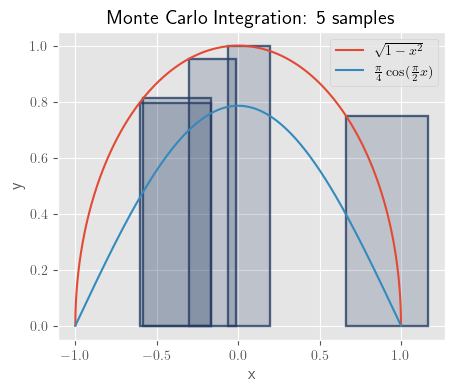

In [205]:
############ Visualisation ###############
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    # "font.sans-serif": "Helvetica",
})
red = (97/255.0,46/255.0,43/255.0)
green = (0,73/255.0,22/255.0)
blue =  (38/255.0,61/255.0,100/255.0)

plt.style.use('ggplot')

# Plot the original function
xs = np.linspace(a, b, 10000)
ys = f(xs)
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(xs, ys, label = r"$\sqrt{1 - x^2}$")

xs = np.linspace(a, b, 10000)
ys = p(xs)
ax.plot(xs, ys, label = r"$\frac{\pi}{4}\cos(\frac{\pi}{2} x)$")


# Get N uniform samples in [0,1), remap to the function's domain
us = np.random.rand(MONTE_CARLO_SAMPLES)
xis = inv_cdf(us)
# Plot the rectangles rectangles for the quadrature
for xi in xis:
    sample_weight = 1/ (MONTE_CARLO_SAMPLES *p(xi))
    rect_width = sample_weight
    rect_height = f(xi)
    rectangle = plt.Rectangle((xi, 0), rect_width, rect_height,linewidth= 25.0 / max(15,MONTE_CARLO_SAMPLES), edgecolor=(*blue,0.8), facecolor=(*blue,0.2))
    ax.add_patch(rectangle)

# Set plot labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f'Monte Carlo Integration: {MONTE_CARLO_SAMPLES} samples')

# Show the plot
ax.legend()

# fig.savefig(f"importance_sampling_{MONTE_CARLO_SAMPLES}.pdf",transparent=True)